In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv("rainfall.csv") 

#Parse date and time
df["datetime"] = pd.to_datetime(df["datetime"], format="%d/%m/%y", errors="coerce")
df = df.dropna(subset=["datetime"]).sort_values("datetime").reset_index(drop=True)

base_features = ["temp", "dew", "sealevelpressure", "winddir", 
                 "solarradiation", "windspeed", "precipprob"]

#Creating lag features
for lag in range(1, 4):
    for col in base_features:
        df[f"{col}_lag{lag}"] = df[col].shift(lag)

df["target"] = df["humidity"]

#Drop Nan rows
df = df.dropna().reset_index(drop=True)


In [3]:
lagged_features = [f"{col}_lag{lag}" for lag in range(1, 4) for col in base_features]

X = df[lagged_features]
y = df["target"]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
def evaluate_regression(name, model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Train metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)

    #Test metrics
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"{name} Regression Performance:\n")
    print("Train:")
    print(f" MAE : {train_mae:.2f}")
    print(f" RMSE: {train_rmse:.2f}")
    print(f" R²   : {train_r2:.3f}")
    
    print("\nTest:")
    print(f" MAE : {test_mae:.2f}")
    print(f" RMSE: {test_rmse:.2f}")
    print(f" R²   : {test_r2:.3f}")


    #For Train Data- to check for overfitting
    plt.figure(figsize=(10,5))
    plt.plot(y_train.values[:100], label='Actual', marker='o')
    plt.plot(y_train_pred[:100], label='Predicted', marker='x')
    plt.title(f"{name} - Humidity Prediction (Training Data)")
    plt.xlabel("Sample Index")
    plt.ylabel("Humidity")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #For Test Data
    plt.figure(figsize=(10,5))
    plt.plot(y_test.values[:100], label='Actual', marker='o')
    plt.plot(y_test_pred[:100], label='Predicted', marker='x')
    plt.title(f"{name} - Humidity Prediction (Testing Data)")
    plt.xlabel("Sample Index")
    plt.ylabel("Humidity")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Linear Regression Performance:

Train:
 MAE : 4.12
 RMSE: 5.64
 R²   : 0.827

Test:
 MAE : 3.83
 RMSE: 5.55
 R²   : 0.839


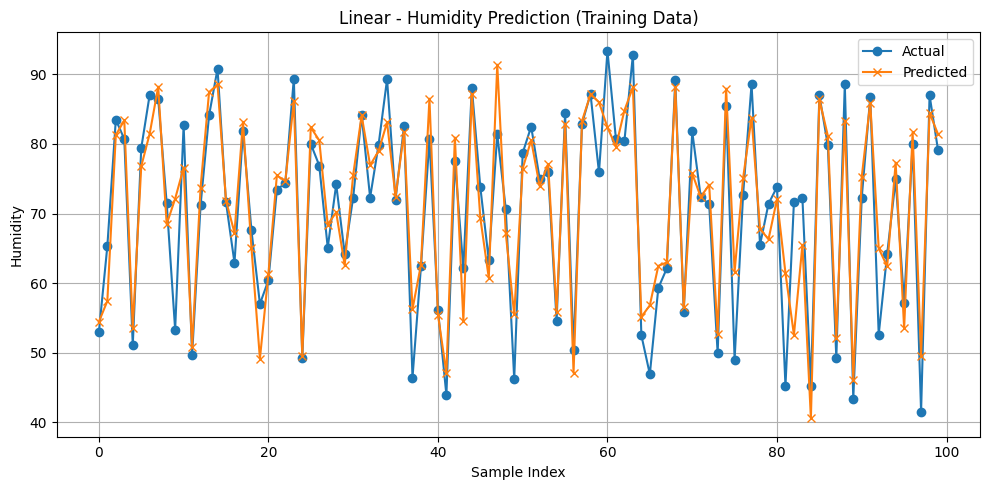

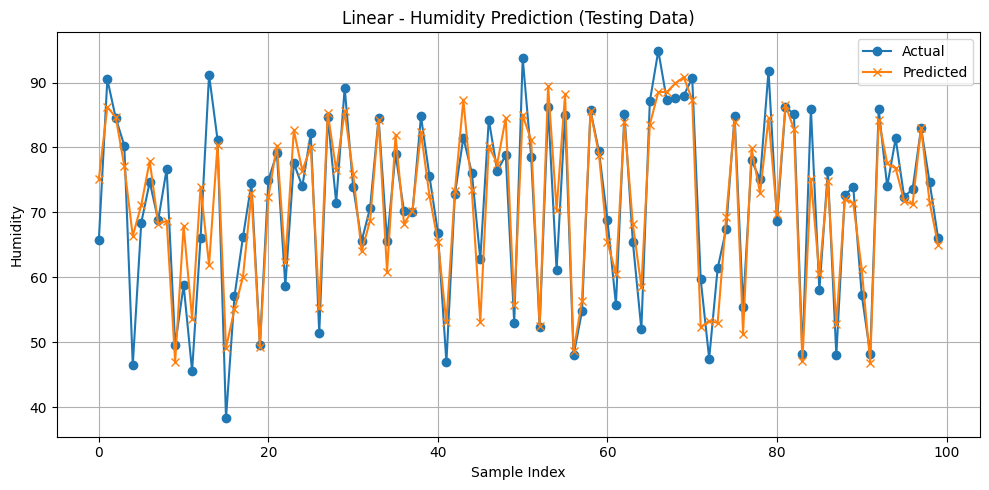

In [5]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_regression("Linear", lr,X_train, y_train, X_test, y_test)

Lasso Regression Performance:

Train:
 MAE : 4.13
 RMSE: 5.66
 R²   : 0.826

Test:
 MAE : 3.83
 RMSE: 5.53
 R²   : 0.840


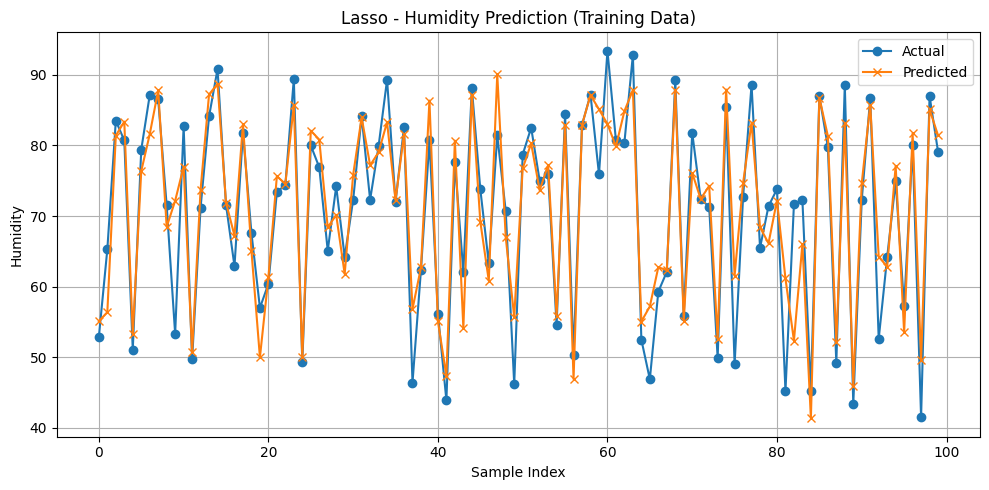

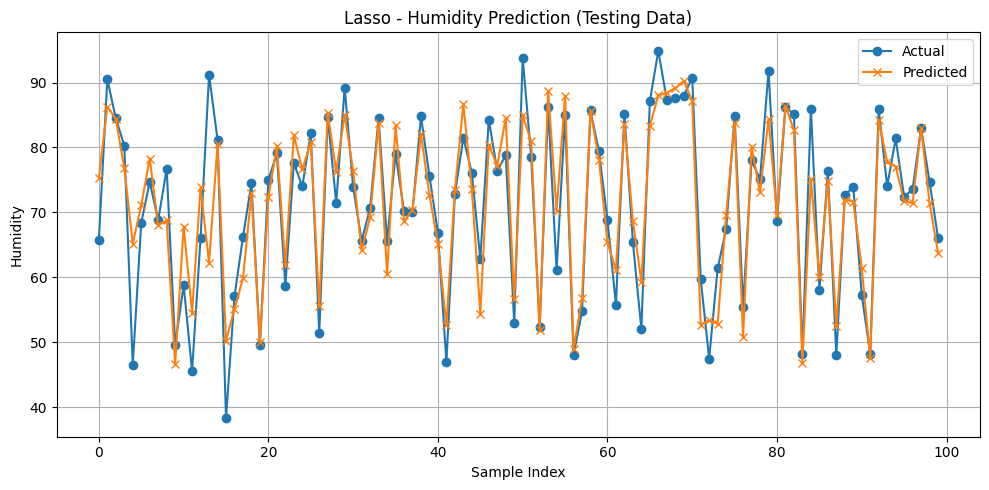

In [6]:
#Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate_regression("Lasso", lasso,X_train, y_train, X_test, y_test)


SVR Regression Performance:

Train:
 MAE : 4.09
 RMSE: 6.58
 R²   : 0.764

Test:
 MAE : 11.63
 RMSE: 13.80
 R²   : 0.004


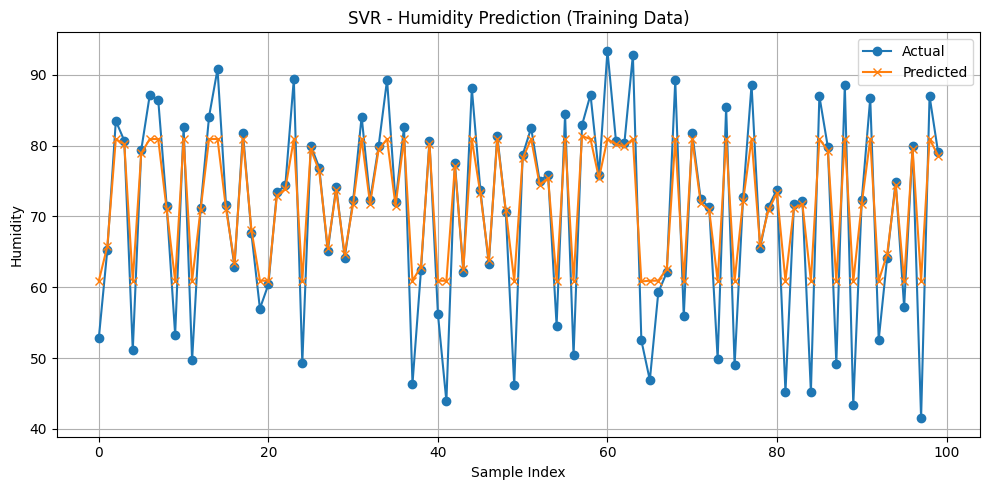

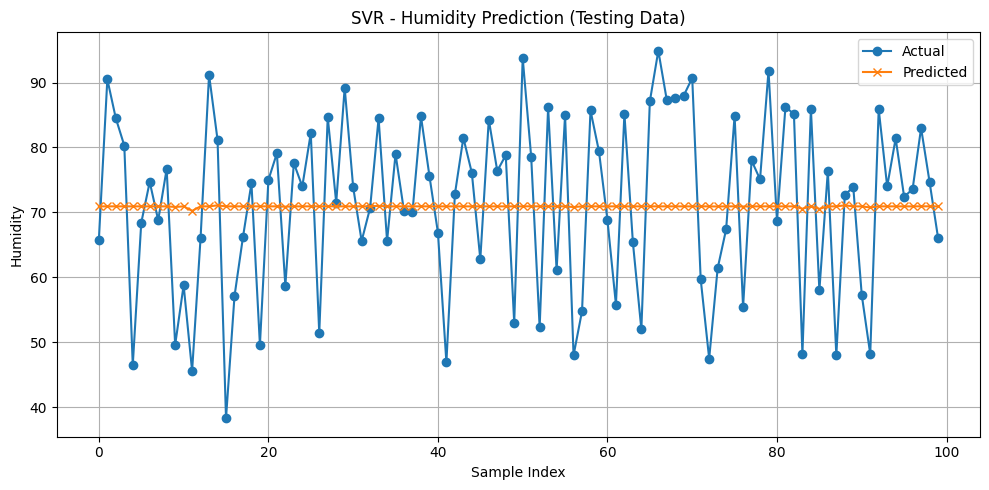

In [7]:
#Support Vector Regression[Overfitting]
svr = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=0.5)
svr.fit(X_train, y_train)
evaluate_regression("SVR", svr,X_train, y_train, X_test, y_test)


Random Forest Regression Performance:

Train:
 MAE : 1.72
 RMSE: 2.39
 R²   : 0.969

Test:
 MAE : 4.17
 RMSE: 6.23
 R²   : 0.797


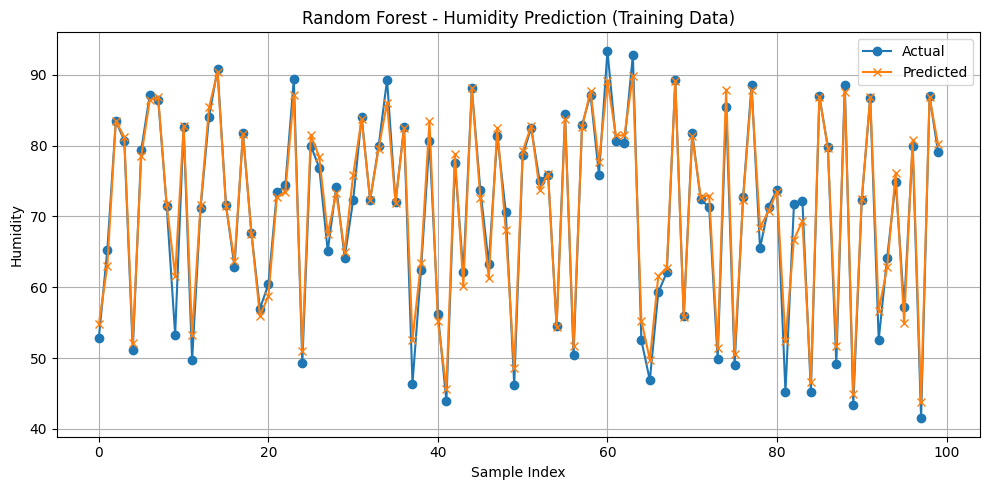

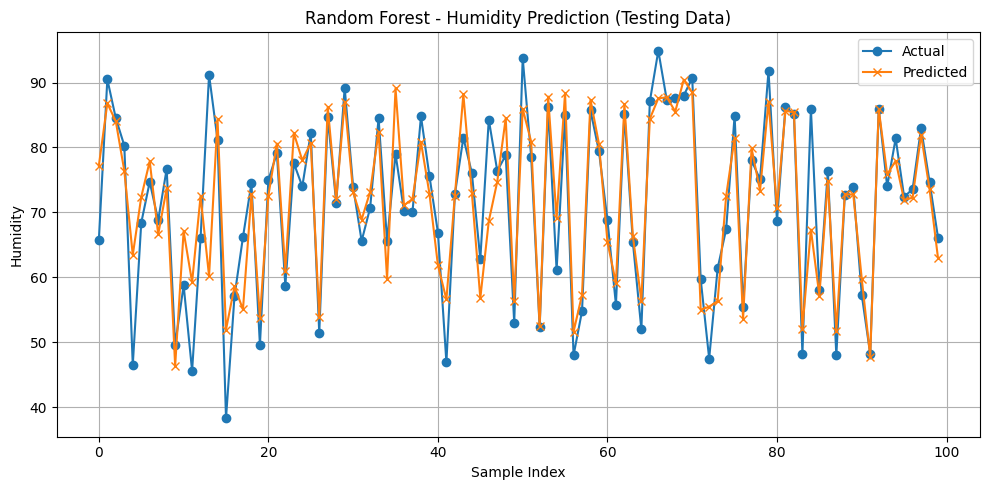

In [8]:
#Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_regression("Random Forest", rf,X_train, y_train, X_test, y_test)


XGBoost Regression Performance:

Train:
 MAE : 0.55
 RMSE: 0.74
 R²   : 0.997

Test:
 MAE : 4.54
 RMSE: 6.55
 R²   : 0.776


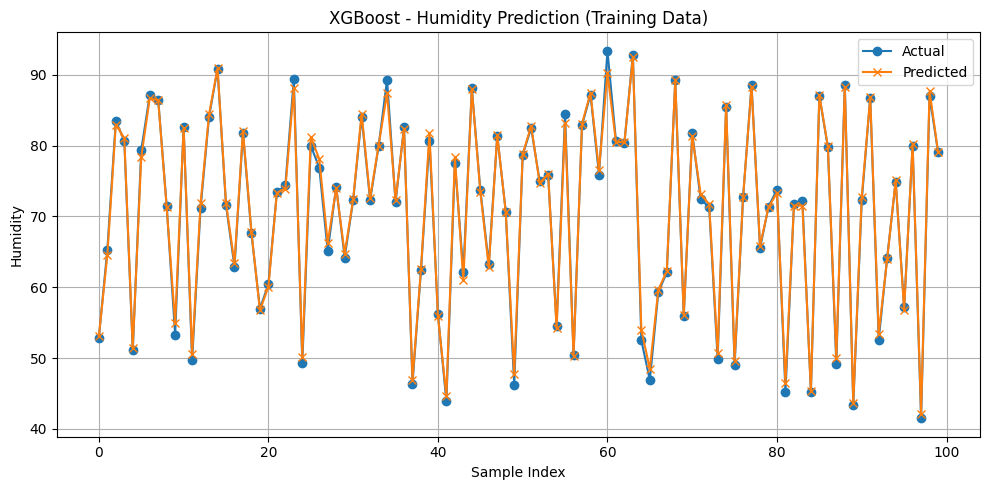

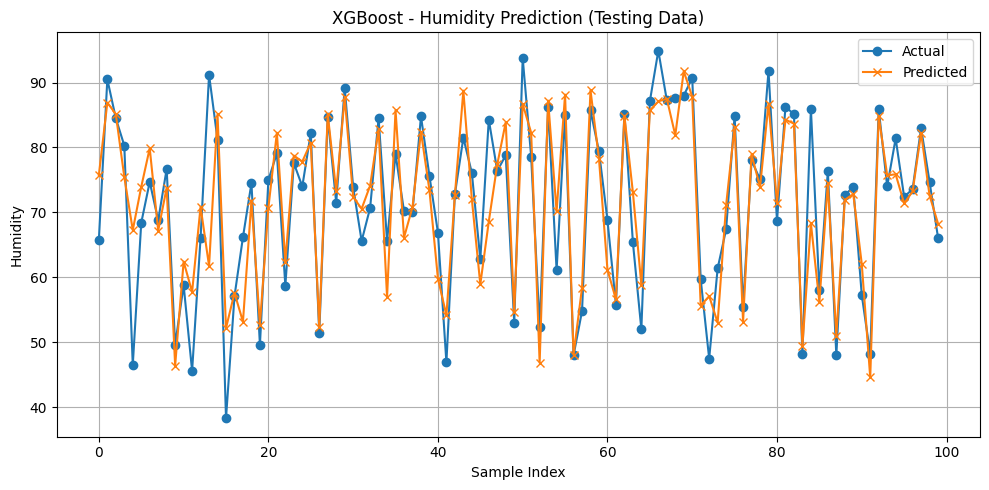

In [9]:
#XGBoost Regressor[OverFitting]
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
evaluate_regression("XGBoost", xgb,X_train, y_train, X_test, y_test)

KNN Regression Performance:

Train:
 MAE : 5.37
 RMSE: 7.09
 R²   : 0.726

Test:
 MAE : 6.07
 RMSE: 8.52
 R²   : 0.621


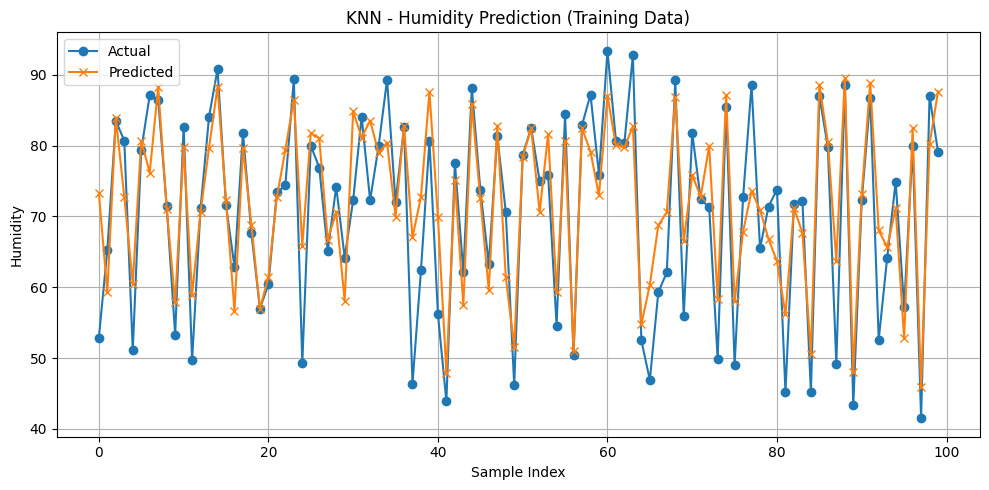

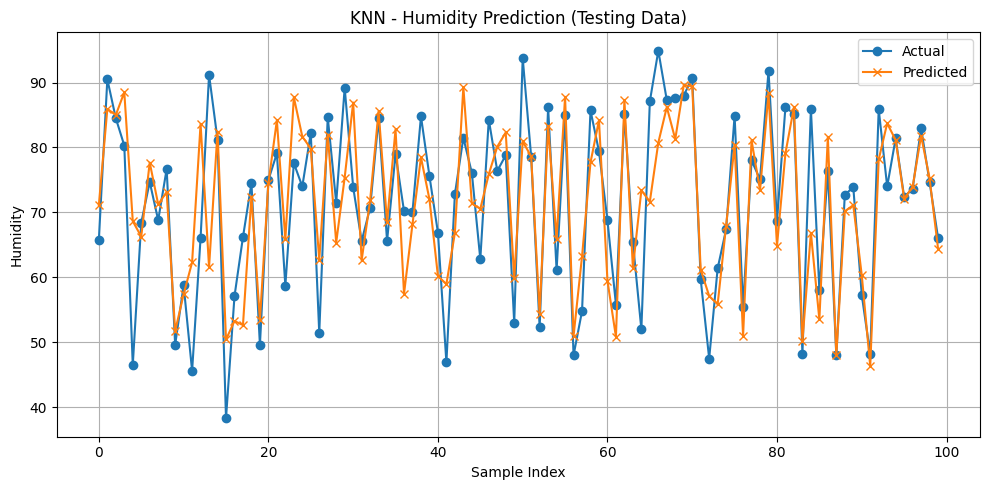

In [10]:
#KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_regression("KNN", knn,X_train, y_train, X_test, y_test)


Conclusion: As per our testing, it can be concluded that Lasso Regression Performed best for the given dataset, This could be due to its Inherent Regularization capability, which supresses irrelevent features